#Preparation

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 49.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Lipinski import NumHAcceptors,NumHDonors
from rdkit.Chem.Crippen import MolLogP
import seaborn as sns
import matplotlib.pyplot as plt


#Import Dataset

In [9]:
compounds= pd.read_csv("./gdrive/MyDrive/PROJECT/KOMPUTASI/V2 MCF7/EDA_dataset.csv",sep=";")

In [10]:
compounds.sample(5)

,Chembl ID,Smiles,IC50,pIC50
8252,CHEMBL4288689,Cc1ccc(-c2csc(NC(=O)COc3ccc(F)cc3F)n2)cc1,14500.0,-4.161368
5364,CHEMBL171026,O=C(NCCN1CCCC1)c1cn2c(ccc3sc4ccccc4c(=O)c32)n1,610.0,-2.785330
11419,CHEMBL4097725,O=C1C=CC(=O)c2c1ccc1c2c(=O)oc2cc(Cl)ccc21,2800.0,-3.447158
9246,CHEMBL4204536,O=c1cc(-c2ccccc2)oc2c(OCCN(CCO)CCO)c(OCc3ccccc...,6070.0,-3.783189
8439,CHEMBL1257830,CN1CCc2cc3c(c4c2[C@H]1Cc1ccccc1-4)OCO3.O=C(O)C...,17700.0,-4.247973


In [11]:
compounds.describe()

,IC50,pIC50
count,1.579100e+04,15791.000000
mean,2.335084e+06,-3.737276
std,2.628102e+08,1.058539
min,1.000000e-02,-10.518514
25%,1.830000e+03,-4.447158
50%,9.000000e+03,-3.954243
75%,2.800000e+04,-3.262451
max,3.300000e+10,2.000000


In [12]:
descriptors = pd.read_csv("./gdrive/MyDrive/PROJECT/KOMPUTASI/MCF7 Drug Design/desc_EDA.csv",sep=";")

In [13]:
descriptors.sample(5)

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
2862,6.024410,6.024410,0.488552,0.488552,0.644989,10.518519,386.473,364.297,386.130028,142,...,0,0,0,0,0,1,0,0,0,0
10648,13.343923,13.343923,0.043404,-1.989504,0.632118,13.136364,371.587,361.507,369.991485,120,...,0,0,0,0,0,0,0,0,0,0
10238,12.308542,12.308542,0.266296,-0.266296,0.640262,14.650000,292.364,276.236,292.099397,106,...,0,0,0,0,1,0,0,1,0,0
2132,5.465557,5.465557,0.035346,0.035346,0.617216,12.291667,338.480,316.304,338.156518,124,...,0,0,0,0,0,0,0,0,0,0
6991,11.630220,11.630220,0.069342,-3.723978,0.721420,20.724138,403.507,382.339,403.135448,146,...,0,1,0,0,0,0,0,0,0,0


In [14]:
for x in descriptors.columns:
  print(x)

MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_

In [15]:
descriptors=descriptors[["MolWt","TPSA","NumHAcceptors","NumHDonors","NumRotatableBonds","MolLogP","NumAromaticHeterocycles","NumAromaticRings"]]

In [16]:
category=[]
for x in compounds["pIC50"]:
  if x <=-3.45:
    category.append("inactive")
  else:
    category.append("active")

compounds["category"]=category


In [17]:
compounds.head()

,Chembl ID,Smiles,IC50,pIC50,category
0,CHEMBL1253582,COC(=O)c1cc2n(c1C)[C@@H](c1ccccc1)SC2,30600.0,-4.485721,inactive
1,CHEMBL403817,COc1cc(-n2c(-c3ccc(Br)cc3)cn(C(C)=O)c2=O)cc(OC...,10600.0,-4.025306,inactive
2,CHEMBL246357,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN1CCOCC1,17200.0,-4.235528,inactive
3,CHEMBL396920,COc1cc(O)c2c(=O)cc(-c3ccccc3Cl)oc2c1CN1CCOCC1,124400.0,-5.094820,inactive
4,CHEMBL246967,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN(C)CC...,5100.0,-3.707570,inactive


In [18]:
compounds.describe(include="all")

,Chembl ID,Smiles,IC50,pIC50,category
count,15791,15791,1.579100e+04,15791.000000,15791
unique,15791,15791,NaN,NaN,2
top,CHEMBL1253582,COC(=O)c1cc2n(c1C)[C@@H](c1ccccc1)SC2,NaN,NaN,inactive
freq,1,1,NaN,NaN,11040
mean,NaN,NaN,2.335084e+06,-3.737276,NaN
std,NaN,NaN,2.628102e+08,1.058539,NaN
min,NaN,NaN,1.000000e-02,-10.518514,NaN
25%,NaN,NaN,1.830000e+03,-4.447158,NaN
50%,NaN,NaN,9.000000e+03,-3.954243,NaN
75%,NaN,NaN,2.800000e+04,-3.262451,NaN


In [19]:
df = pd.concat([compounds,descriptors], axis= 1)
df.head()

,Chembl ID,Smiles,IC50,pIC50,category,MolWt,TPSA,NumHAcceptors,NumHDonors,NumRotatableBonds,MolLogP,NumAromaticHeterocycles,NumAromaticRings
0,CHEMBL1253582,COC(=O)c1cc2n(c1C)[C@@H](c1ccccc1)SC2,30600.0,-4.485721,inactive,273.357,31.23,4.0,0.0,2.0,3.37682,1.0,2.0
1,CHEMBL403817,COc1cc(-n2c(-c3ccc(Br)cc3)cn(C(C)=O)c2=O)cc(OC...,10600.0,-4.025306,inactive,447.285,71.69,7.0,0.0,5.0,3.75440,1.0,3.0
2,CHEMBL246357,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN1CCOCC1,17200.0,-4.235528,inactive,417.889,68.23,6.0,1.0,7.0,3.79110,0.0,2.0
3,CHEMBL396920,COc1cc(O)c2c(=O)cc(-c3ccccc3Cl)oc2c1CN1CCOCC1,124400.0,-5.094820,inactive,401.846,72.14,6.0,1.0,4.0,3.65980,1.0,3.0
4,CHEMBL246967,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN(C)CC...,5100.0,-3.707570,inactive,447.915,85.30,7.0,1.0,10.0,3.95380,0.0,2.0


In [20]:
df.describe()

,IC50,pIC50,MolWt,TPSA,NumHAcceptors,NumHDonors,NumRotatableBonds,MolLogP,NumAromaticHeterocycles,NumAromaticRings
count,1.579100e+04,15791.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000,14880.000000
mean,2.335084e+06,-3.737276,371.708807,76.874140,5.184140,1.389651,4.625336,3.292124,0.924731,2.509341
std,2.628102e+08,1.058539,72.166888,27.531884,1.835083,1.088120,2.668834,1.235937,0.890832,1.159928
min,1.000000e-02,-10.518514,108.096000,0.000000,0.000000,0.000000,0.000000,-8.869600,0.000000,0.000000
25%,1.830000e+03,-4.447158,323.213250,56.737500,4.000000,1.000000,3.000000,2.617200,0.000000,2.000000
50%,9.000000e+03,-3.954243,376.439000,75.710000,5.000000,1.000000,4.000000,3.494800,1.000000,3.000000
75%,2.800000e+04,-3.262451,428.449000,95.580000,7.000000,2.000000,6.000000,4.220725,1.000000,3.000000
max,3.300000e+10,2.000000,499.980000,190.180000,9.000000,4.000000,22.000000,4.999900,5.000000,7.000000


#Active Vs Inactive Compounds

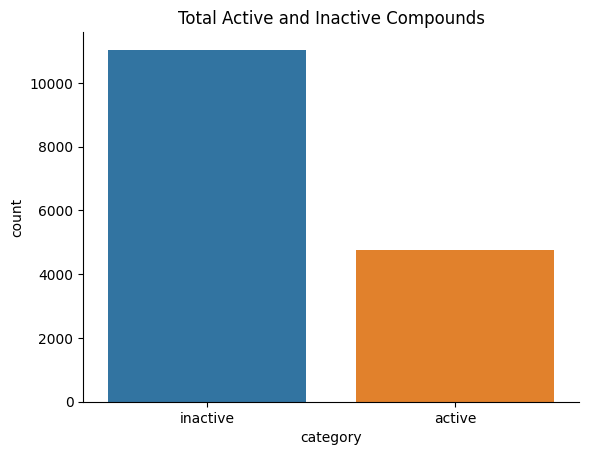

In [21]:
fig = sns.countplot(x='category', data=df)
sns.despine()
plt.title("Total Active and Inactive Compounds")
plt.show()

##Physicochemicals

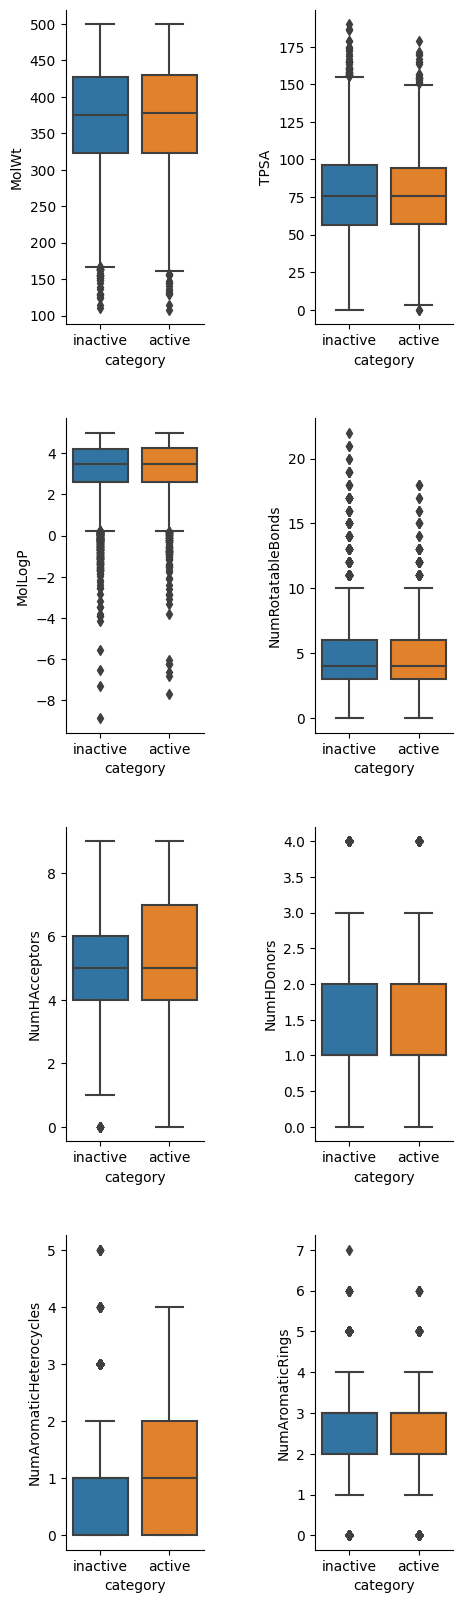

In [22]:
fig,axes = plt.subplots(
    ncols=2,
    nrows=4,
    figsize=(5,20),
    # layout="constrained"
)

axes[0,0]=sns.boxplot(
    data=df,
    y="MolWt",
    x="category",
    ax=axes[0,0]
    # log_scale=True,
)
axes[0,1]=sns.boxplot(
    data=df,
    y="TPSA",
    x="category",
    ax=axes[0,1]
    # log_scale=True,
)
axes[1,0]=sns.boxplot(
    data=df,
    y="MolLogP",
    x="category",
    ax=axes[1,0],
    # log_scale=True,
)

axes[1,1]=sns.boxplot(
    data=df,
    y="NumRotatableBonds",
    x="category",
    ax=axes[1,1]
    # log_scale=True,
)

axes[2,0]=sns.boxplot(
    data=df,
    y="NumHAcceptors",
    x="category",
    ax=axes[2,0]
    # log_scale=True,
)
axes[2,1]=sns.boxplot(
    data=df,
    y="NumHDonors",
    x="category",
    ax=axes[2,1]
    # log_scale=True,
)
axes[3,0]=sns.boxplot(
    data=df,
    y="NumAromaticHeterocycles",
    x="category",
    ax=axes[3,0]
    # log_scale=True,
)
axes[3,1]=sns.boxplot(
    data=df,
    y="NumAromaticRings",
    x="category",
    ax=axes[3,1]
    # log_scale=True,
)

sns.despine()
fig.subplots_adjust( hspace=0.3,wspace=0.8)
fig.show()

In [23]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IC50,pIC50,MolWt,TPSA,NumHAcceptors,NumHDonors,NumRotatableBonds,MolLogP,NumAromaticHeterocycles,NumAromaticRings
IC50,1.000000,-0.054776,-0.002693,-0.008790,0.003770,-0.002569,-0.001984,-0.009440,0.000926,-0.003622
pIC50,-0.054776,1.000000,0.005821,-0.012194,0.004127,-0.003429,-0.006732,0.004669,0.006316,0.012246
MolWt,-0.002693,0.005821,1.000000,0.482135,0.558201,0.144225,0.496334,0.331324,0.113348,0.316801
TPSA,-0.008790,-0.012194,0.482135,1.000000,0.729824,0.556227,0.277319,-0.260494,0.175496,0.114468
NumHAcceptors,0.003770,0.004127,0.558201,0.729824,1.000000,0.123202,0.327343,-0.121370,0.306792,0.217594
NumHDonors,-0.002569,-0.003429,0.144225,0.556227,0.123202,1.000000,0.133128,-0.161974,0.022909,0.000630
NumRotatableBonds,-0.001984,-0.006732,0.496334,0.277319,0.327343,0.133128,1.000000,0.246645,-0.027128,0.109369
MolLogP,-0.009440,0.004669,0.331324,-0.260494,-0.121370,-0.161974,0.246645,1.000000,0.068584,0.364936
NumAromaticHeterocycles,0.000926,0.006316,0.113348,0.175496,0.306792,0.022909,-0.027128,0.068584,1.000000,0.707696
NumAromaticRings,-0.003622,0.012246,0.316801,0.114468,0.217594,0.000630,0.109369,0.364936,0.707696,1.000000


In [24]:
df.columns

Index(['Chembl ID', 'Smiles', 'IC50', 'pIC50', 'category', 'MolWt', 'TPSA',
       'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds', 'MolLogP',
       'NumAromaticHeterocycles', 'NumAromaticRings'],
      dtype='object')

In [25]:
phys=['MolWt', 'TPSA','NumHAcceptors', 'NumHDonors', 'NumRotatableBonds', 'MolLogP','NumAromaticHeterocycles', 'NumAromaticRings']

In [26]:
from scipy import stats
from scipy.stats import normaltest,shapiro,ks_1samp,mannwhitneyu
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [27]:
df[df["category"]=="active"].sample(1)

,Chembl ID,Smiles,IC50,pIC50,category,MolWt,TPSA,NumHAcceptors,NumHDonors,NumRotatableBonds,MolLogP,NumAromaticHeterocycles,NumAromaticRings
2274,CHEMBL148849,N#CC1CN1C(=O)Nc1cccc2ccccc12,2000.0,-3.30103,active,426.922,93.73,5.0,2.0,10.0,3.9935,0.0,2.0


In [28]:
norm_active_result = []
norm_inactive_result = []
next_result=[]

for x in phys:
  a = ks_1samp(df[df["category"]=="active"][x],stats.norm.cdf)
  b = ks_1samp(df[df["category"]=="inactive"][x],stats.norm.cdf)
  next_result.append("t-Test" if a.pvalue > 0.05 and b.pvalue > 0.05 else "Mann-Whitney U Test")
  norm_active_result.append(a)
  norm_inactive_result.append(b)
  print(f"{x} p-value\nStandard: {a.pvalue}\nMn: {b.pvalue}")
  print(f"Next Analysis:","t-Test" if a.pvalue > 0.05 and b.pvalue > 0.05 else "Mann-Whitney U Test","\n")

MolWt p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

TPSA p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

NumHAcceptors p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

NumHDonors p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

NumRotatableBonds p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

MolLogP p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

NumAromaticHeterocycles p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 

NumAromaticRings p-value
Standard: nan
Mn: nan
Next Analysis: Mann-Whitney U Test 



In [29]:
len(norm_active_result)

8

In [30]:
utest_result=[]
conclusion=[]
for x in phys:
  a = df[df["category"]=="active"][x]
  b = df[df["category"]=="inactive"][x]
  c=mannwhitneyu(a,b)
  utest_result.append(c)
  conclusion.append("Significantly different" if c.pvalue <0.05 else "Unsignificantly different")

In [31]:
len(next_result)

8

In [32]:
pd.DataFrame(
    {
        "variable":phys,
        "statistic_active":[x.statistic for x in norm_active_result],
        "pvalue_active":[x.pvalue for x in norm_active_result],
        "statistic_inactive":[x.statistic for x in norm_inactive_result],
        "pvalue_inactive":[x.pvalue for x in norm_inactive_result],
        "test type":next_result,
        # "variable":columns,
        "statistic":[x.statistic for x in utest_result],
        "pvalue":[x.pvalue for x in utest_result],
        "conclusion":conclusion,
    }
)

,variable,statistic_active,pvalue_active,statistic_inactive,pvalue_inactive,test type,statistic,pvalue,conclusion
0,MolWt,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
1,TPSA,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
2,NumHAcceptors,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
3,NumHDonors,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
4,NumRotatableBonds,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
5,MolLogP,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
6,NumAromaticHeterocycles,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different
7,NumAromaticRings,NaN,NaN,NaN,NaN,Mann-Whitney U Test,NaN,NaN,Unsignificantly different


In [33]:
df.groupby("category").mean().T


<ipython-input-33-722d2c01b053>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("category").mean().T


category,active,inactive
IC50,838.464667,3.339612e+06
pIC50,-2.464001,-4.285222e+00
MolWt,372.558593,3.713473e+02
TPSA,76.397588,7.707688e+01
NumHAcceptors,5.190272,5.181531e+00
NumHDonors,1.378969,1.394195e+00
NumRotatableBonds,4.595587,4.637992e+00
MolLogP,3.298453,3.289432e+00
NumAromaticHeterocycles,0.941229,9.177124e-01
NumAromaticRings,2.543571,2.494779e+00


In [34]:
df.groupby("category").std().T

<ipython-input-34-84ca4b48c524>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("category").std().T


category,active,inactive
IC50,832.667679,3.143121e+08
pIC50,0.882055,5.195718e-01
MolWt,72.956339,7.182887e+01
TPSA,27.050385,2.773299e+01
NumHAcceptors,1.850141,1.828722e+00
NumHDonors,1.077952,1.092436e+00
NumRotatableBonds,2.631483,2.684591e+00
MolLogP,1.257662,1.226630e+00
NumAromaticHeterocycles,0.892872,8.899125e-01
NumAromaticRings,1.165555,1.157275e+00


In [36]:
df["Smiles"].to_csv("smiles.smi", index=False,header=False)

#Multivariate Analysis

In [37]:
df.head()

,Chembl ID,Smiles,IC50,pIC50,category,MolWt,TPSA,NumHAcceptors,NumHDonors,NumRotatableBonds,MolLogP,NumAromaticHeterocycles,NumAromaticRings
0,CHEMBL1253582,COC(=O)c1cc2n(c1C)[C@@H](c1ccccc1)SC2,30600.0,-4.485721,inactive,273.357,31.23,4.0,0.0,2.0,3.37682,1.0,2.0
1,CHEMBL403817,COc1cc(-n2c(-c3ccc(Br)cc3)cn(C(C)=O)c2=O)cc(OC...,10600.0,-4.025306,inactive,447.285,71.69,7.0,0.0,5.0,3.75440,1.0,3.0
2,CHEMBL246357,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN1CCOCC1,17200.0,-4.235528,inactive,417.889,68.23,6.0,1.0,7.0,3.79110,0.0,2.0
3,CHEMBL396920,COc1cc(O)c2c(=O)cc(-c3ccccc3Cl)oc2c1CN1CCOCC1,124400.0,-5.094820,inactive,401.846,72.14,6.0,1.0,4.0,3.65980,1.0,3.0
4,CHEMBL246967,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN(C)CC...,5100.0,-3.707570,inactive,447.915,85.30,7.0,1.0,10.0,3.95380,0.0,2.0


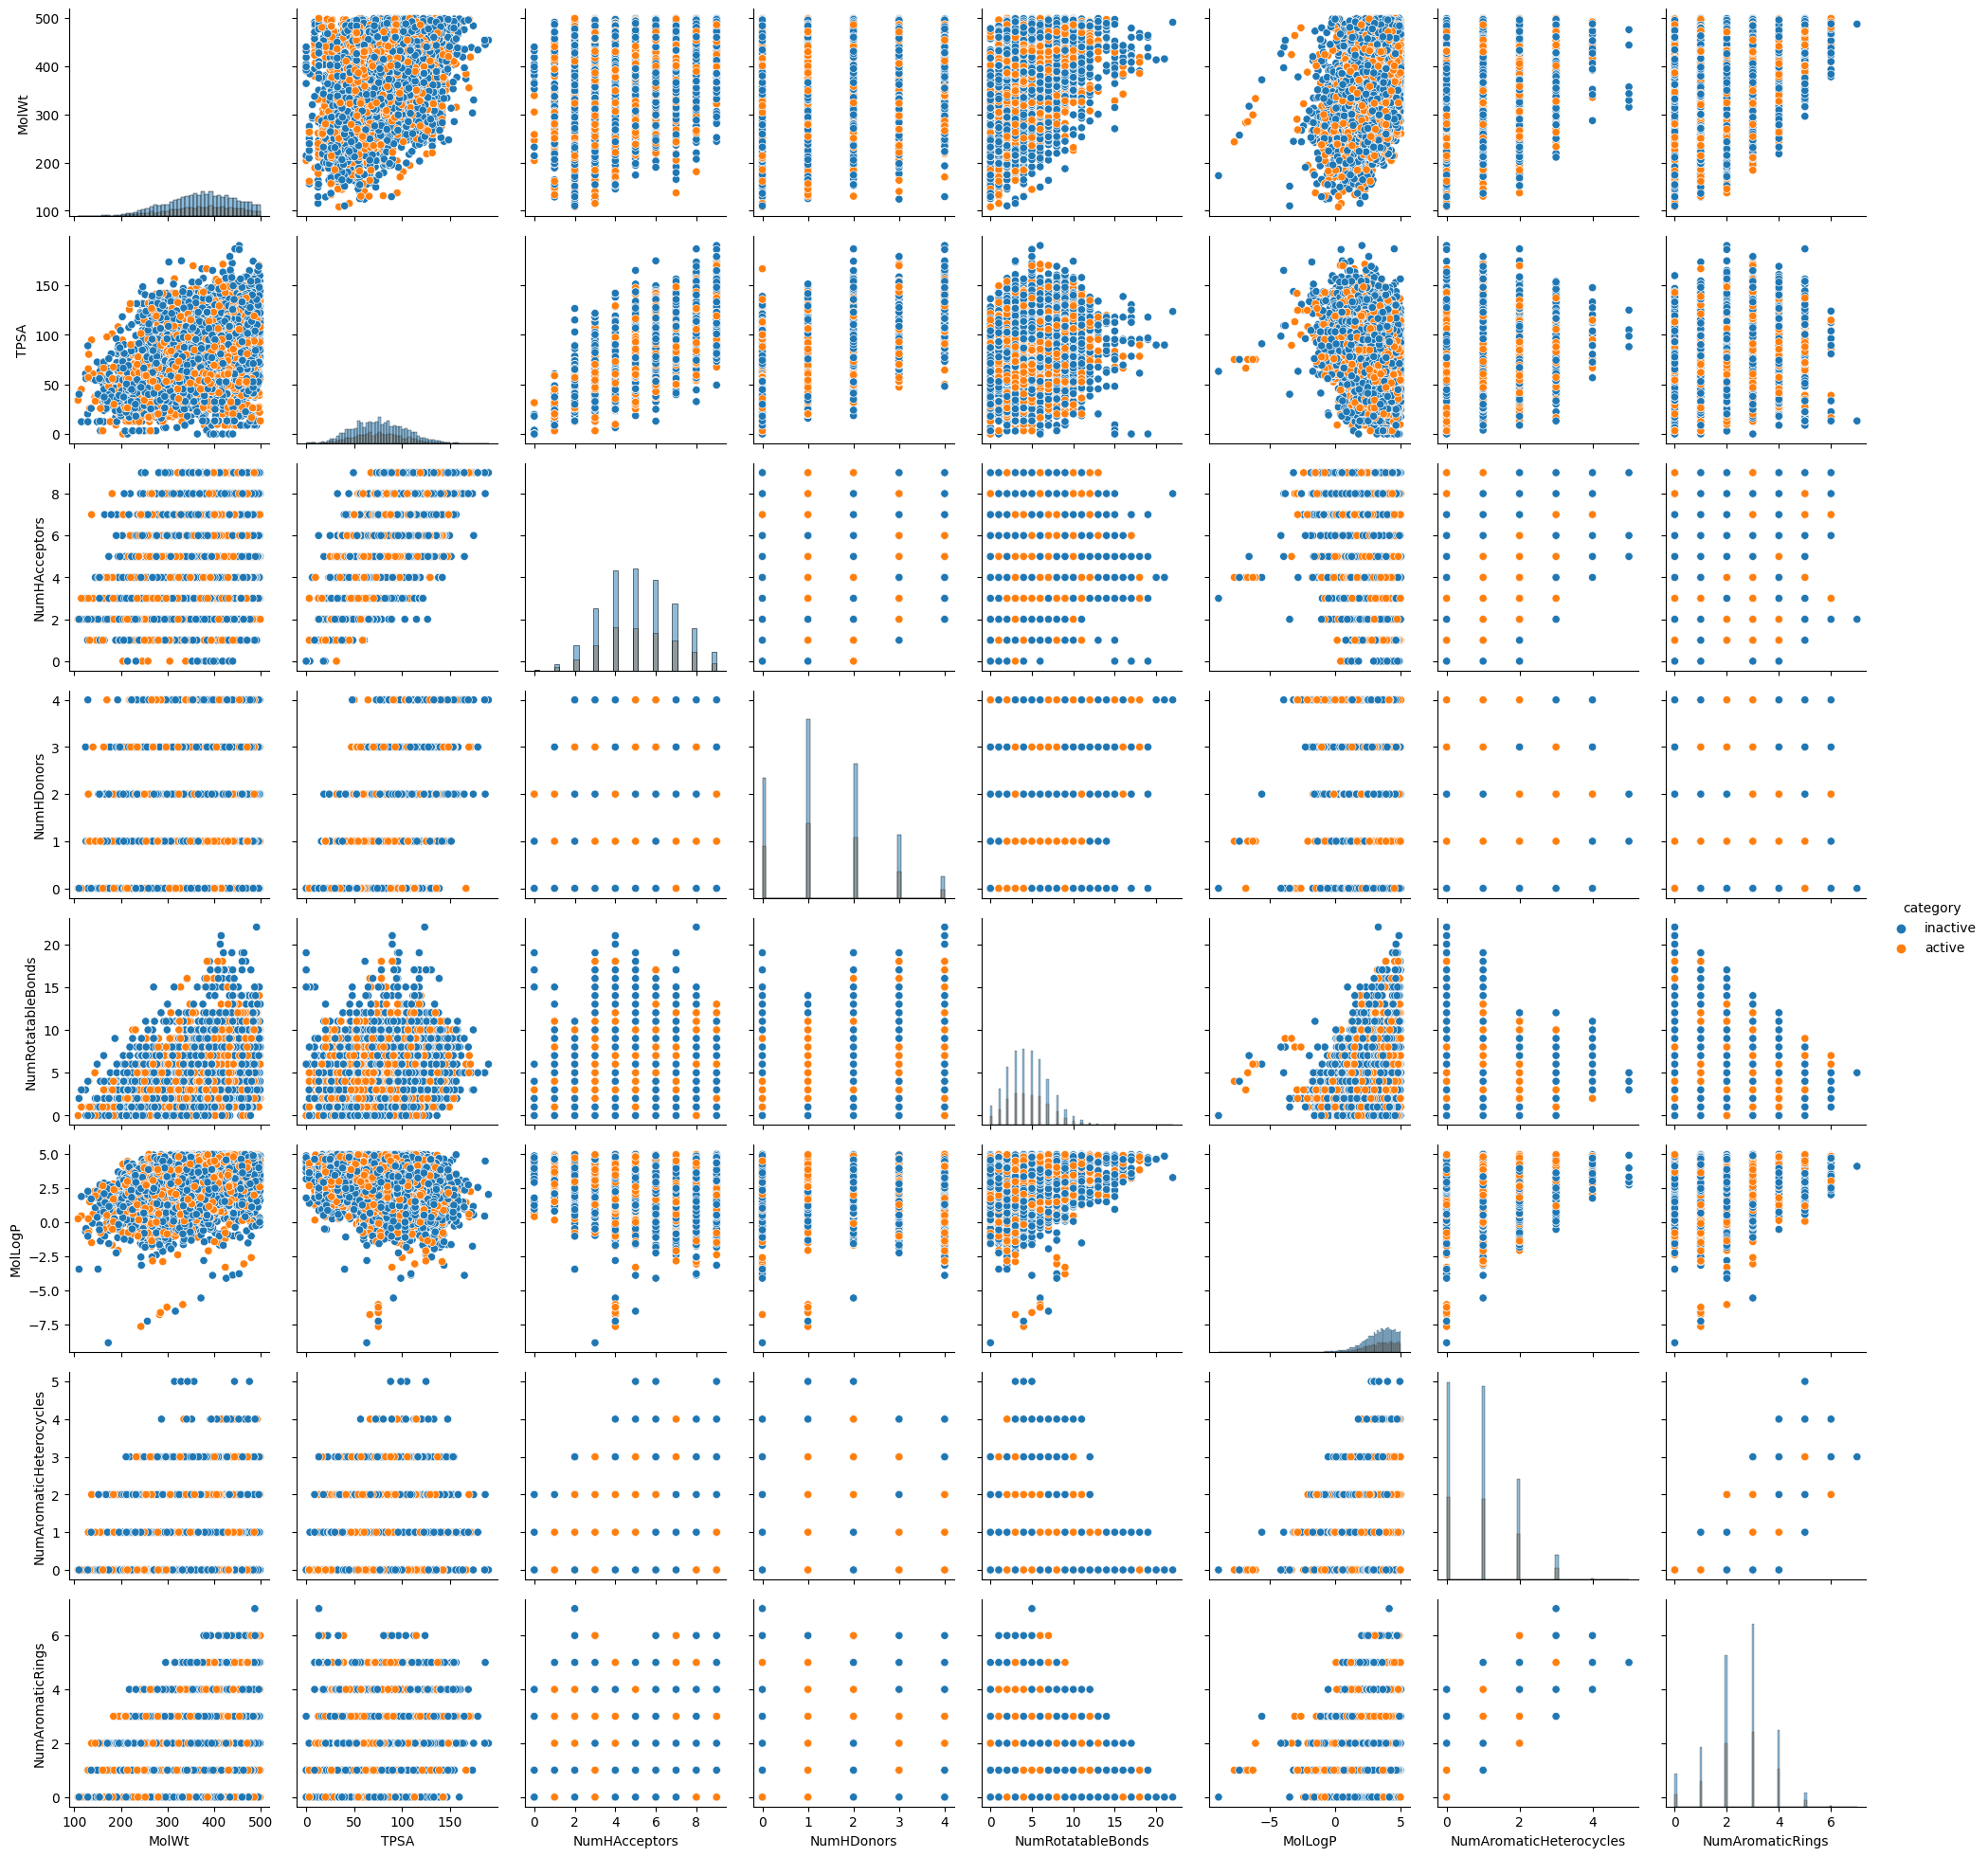

In [38]:
g = sns.PairGrid(df.drop(columns=["IC50","pIC50"],axis=1), hue="category")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()